### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("./data/train.csv")

In [6]:
df.head()

,Review,Label
0,Stuning even for the non-gamer: This sound tra...,positive
1,The best soundtrack ever to anything.: I'm rea...,positive
2,Amazing!: This soundtrack is my favorite music...,positive
3,Excellent Soundtrack: I truly like this soundt...,positive
4,"Remember, Pull Your Jaw Off The Floor After He...",positive


In [7]:
# Value Counts
df['Label'].value_counts()

positive    530160
negative    518415
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

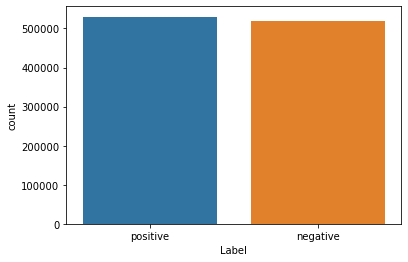

In [8]:
# Plot
sns.countplot(x='Label',data=df)

In [9]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# User handles
df['Clean_Review'] = df['Review'].apply(nfx.remove_userhandles)

In [11]:
# Stopwords
df['Clean_Review'] = df['Clean_Review'].apply(nfx.remove_stopwords)

In [12]:
df

,Review,Label,Clean_Review
0,Stuning even for the non-gamer: This sound tra...,positive,Stuning non-gamer: sound track beautiful! pain...
1,The best soundtrack ever to anything.: I'm rea...,positive,best soundtrack anything.: I'm reading lot rev...
2,Amazing!: This soundtrack is my favorite music...,positive,"Amazing!: soundtrack favorite music time, hand..."
3,Excellent Soundtrack: I truly like this soundt...,positive,Excellent Soundtrack: truly like soundtrack en...
4,"Remember, Pull Your Jaw Off The Floor After He...",positive,"Remember, Pull Jaw Floor Hearing it: played ga..."
...,...,...,...
1048570,Good book: We like having a strange assortment...,positive,Good book: like strange assortment reading mat...
1048571,Cheap and flimsy: This was bought for an event...,negative,"Cheap flimsy: bought event left venue, miss bit."
1048572,Total waste of money: This was a total waste o...,negative,Total waste money: total waste money. bought t...
1048573,Whitmor budget garment rack: I purchased the W...,positive,Whitmor budget garment rack: purchased Whitmor...


In [13]:
# Features & Labels
Xfeatures = df['Clean_Review']
ylabels = df['Label']

In [14]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [15]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [16]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [17]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\chand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [18]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.8923175224828577

In [59]:
# Make A Prediction
ex1 = " not a bad product"

In [60]:
pipe_lr.predict([ex1])

array(['negative'], dtype=object)

In [61]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.81144418, 0.18855582]])

In [23]:
# To Know the classes
pipe_lr.classes_

array(['negative', 'positive'], dtype=object)

In [24]:
# Save Model & Pipeline
import joblib
pipeline_file = open("amazon_review.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()